# Parallelograms Detection. 
---

## Project description

Parallelograms appear frequently in images that contain man-made objects. They often correspond to the projections of rectangular surfaces when viewed at an angle that is not perpendicular to the surfaces. In this project, you are to design and implement a program that can detect parallelograms of all sizes in an image.

Your program will consist of three steps: 
1. detect edges using the Sobel’s operator, 
2. detect straight line segments using the Hough Transform, and
3. detect parallelograms from the straight-line segments detected in step (2). 
In step (1), compute edge magnitude using the formula below and then normalize the magnitude values to lie within the range [0,255]. Next, manually choose a threshold value to produce a binary edge map.

`Edge Magnitude = sqrt[(Gx)^2 + (Gy)^2]. (Gx and Gy are the horizontal and vertical gradients, respectively.)`

The test images that will be provided to you are in color so you will need to convert them into grayscale images by using the formula `luminance = 0.30R + 0.59G + 0.11B`, where R, G, and B, are the red, green, and blue components. Test images in both JPEG band RAW image formats will be provided. In the RAW image format, the red, green, and blue components of the pixels are recorded in an interleaved manner, occupying one byte per color component per pixel (See description below).  The RAW image format does not contain any header bytes.

What to hand in: Hand in a report (in MS Words or PDF format) that contains (1) details on how you detect parallelograms, (2) the programming language used and instructions on how to compile and run your program,  (3) the source code of your program with inline comments, and (4) for each test image: the original test image1, the normalized gradient magnitude (as a grayscale image), the edge map after thresholding (as a binary image) and the threshold value used, and the x-y coordinates of the four corners of the parallelograms detected by your program. For display purposes, use gray level 0 for edges and 255 for background in the binary edge map.  In addition to copy-and-paste your image results onto the report, also hand in the original image files as generated by your program for the normalized gradient magnitude and binary edge map. Points will be taken off if any of the above are missing.  

**Extra Credits (10 points). This part is optional.**

For each test image, produce an output image that contains the original color or grayscale image with the detected parallelograms superimposed on it. Copy and paste the output image onto your report and hand in the original output image file as well.

---
INTERLEAVED RAW image format. The data arrangement for the interleaved raw image format is illustrated below, assuming an image of size  M X N (rows X columns).

R(0,0) G(0,0) B(0,0) R(0,1) G(0,1) B(0,1) ……………………………………R(0,N-1) G(0,N-1) B(0,N-1)

R(1,0) G(1,0) B(1,0) R(1,1) G(1,1) B(1,1) ……………………………………R(1,N-1) G(1,N-1) B(1,N-1)

...

R(M-1,0) G(M-1,0) B(M-1,0) R(M-1,1) G(M-1,1)B(M-1,1)………  R(M-1, N-1)G(M-1, N-1)B(M-1, N-1)  

In [1]:
#Metadata
import sys
%load_ext watermark
%watermark -a "Vutsal Singhal"
%watermark -p cv2
%watermark 

Vutsal Singhal
cv2 3.3.0
2017-10-15T23:40:21-04:00

CPython 3.5.2
IPython 6.2.1

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.10.0-37-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


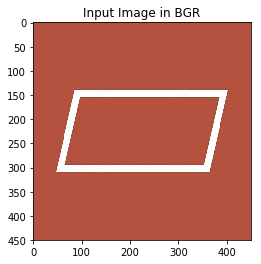

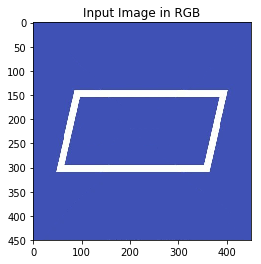

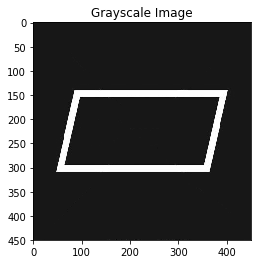

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

bgr = cv2.imread('pll2.jpg')
rgb = bgr[:,:,::-1]

plt.title('Input Image in BGR')
plt.imshow(bgr)
plt.show()

plt.title('Input Image in RGB')
plt.imshow(rgb)
plt.show()

def rgb2gray(rgb):
    return np.dot(rgb[:,:,:3], [0.299, 0.587, 0.114])

gray = rgb2gray(rgb)

plt.title('Grayscale Image')
plt.imshow(gray,cmap='gray')
plt.show()

In [2]:
def sliding_window(img, step_size=1, window_size=(3,3)):
    for y in range(0, img.shape[0]-(step_size+1), step_size):
        for x in range(0, img.shape[1]-(step_size+1), step_size):
            yield (x, y, img[y:y + window_size[1], x:x + window_size[0]])

In [3]:
# Sobel's Operators

sobel_x_oper = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y_oper = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

#sobel_x_oper = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
#sobel_y_oper = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

Gx = np.zeros(gray.shape,dtype=np.int)
Gy = np.zeros(gray.shape,dtype=np.int)

In [4]:
windows = sliding_window(gray)
for i in range(1,gray.shape[0]-2):
    for j in range(1,gray.shape[1]-2):
        w = next(windows)
        Gx[i,j] = np.tensordot(sobel_x_oper,w[2])
        Gy[i,j] = np.tensordot(sobel_y_oper,w[2])

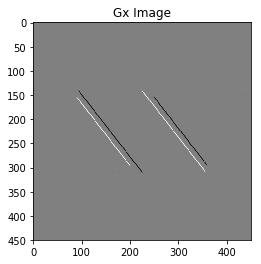

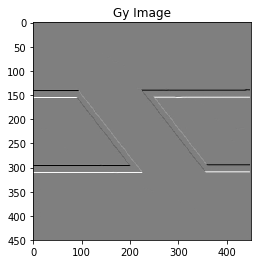

In [5]:
plt.title('Gx Image')
plt.imshow(Gx,cmap='gray')
plt.show()

plt.title('Gy Image')
plt.imshow(Gy,cmap='gray')
plt.show()

In [6]:
G_mag = np.sqrt(np.add(np.square(Gx),np.square(Gy)))

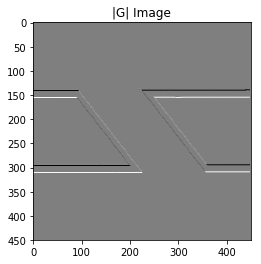

In [7]:
plt.title('|G| Image')
plt.imshow(Gy,cmap='gray')
plt.show()